In [1]:
import numpy as np
from enum import Enum
from dataclasses import dataclass
from typing import Dict

In [3]:
proto_tile_data = build_proto_data()
tile_data = generate_compatible_tiles(proto_tile_data)

In [13]:
width, height = 20, 20

grid = Grid(width, height, tile_data)
for (i,j) in [(5,5),(15,15)]:
    grid.cells[i,j] = CollapsedCell(tile_data, ProtoTileNames.TERMINAL)
    grid.collapse(i,j)

grid.collapse_all()


grid.print()

         |     bd   
         |     |    
      b--+-----+---c
      |  |     |   |
     b+c |     |   |
     t|a-d     |   |
      |        |   |
      |        a---d
b--c  ac            
|  |   ac           
d  |    |          b
   |    |          |
   |    a-c   b--c |
   |      |   ac | |
   |      |    | ac|
bc a--c   |    t  ||
++---c|   |       |a
||   ad   |       | 
||        |       | 
ad       bd     b-d 


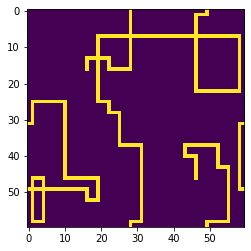

In [14]:
def synthesize_img(grid):
    return np.concatenate([
        np.concatenate([tile_data[c.tile].pixels for c in row],axis=1)
        for row in grid.cells], axis=0
    )

img = synthesize_img(grid)

from matplotlib import pyplot as plt
plt.imshow(img)
plt.show()

In [104]:
grid.cells[2,2].get_compatible_tiles(Directions.UP)

{<ProtoTileNames.EMPTY: 'empty'>, <ProtoTileNames.HORIZONTAL_PIPE: '-'>}

In [ ]:
np.argmin()

In [59]:
min((c for c in grid.reshape(-1)), key = lambda c: c.entropy())

In [77]:
grid[0,0].collapse().tile

<ProtoTileNames.VERTICAL_PIPE: '|'>

In [66]:
grid[0,0].tile()

AttributeError: 'UncollapsedCell' object has no attribute 'tile'

In [ ]:
Test = Enum()